# Final Notebook


## Preparation


In [308]:
# add src to path
import sys
import os

# Add the directory `src` containing python code
sys.path.append(os.path.abspath("../src"))

In [309]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [310]:
# common imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import display
from IPython.core.display import HTML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split

## Data Exploration Analysis


### Import data


In [311]:
df = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")

### Auxiliary functions


In [312]:
# # Function to create scrollable table within a small window
# def create_scrollable_table(df: pd.DataFrame, table_id: str, title: str):
#     html = f"<h3>{title}</h3>"
#     html += f'<div id="{table_id}" style="height:600px; overflow:auto;">'
#     html += df.to_html()
#     html += "</div>"
#     return html


# def render_scrooll(df: pd.Series, title: str = ""):
#     html_null_values = create_scrollable_table(df.to_frame(), "Scrollable", title)

#     display(HTML(html_null_values))

In [313]:
# def graph_price_bar(df: pd.DataFrame, feature_name: str, title: str):
#     """This function return a plotly express figute for with a bar chart of the price and another feature

#     Parameters
#     ----------
#     df : pd.DataFrame
#         The dataframe that has the data
#     feature_name : str
#         The name of the column that will be use as the x-axis
#     title : str
#         The title of the plot

#     Return
#     ------
#     fig: Figure
#         The plotly express figure
#     """
#     colors = px.colors.qualitative.Plotly
#     feature_to_prices = df.groupby(feature_name)["SalePrice"].mean()
#     fig = px.bar(
#         x=feature_to_prices.index,
#         y=feature_to_prices.values,
#         title=title,
#         # color_discrete_sequence=["purple", "green"],
#         text=feature_to_prices.values,
#         template="plotly_dark",
#     )

#     fig.update_traces(
#         marker_color=colors, texttemplate="$%{text:,.0f}", textposition="outside"
#     )
#     fig.update_yaxes(title="Sale Price", tickprefix="$", tickformat=",")
#     fig.update_xaxes(title=title)
#     fig.update_layout(uniformtext_minsize=8, uniformtext_mode="hide")
#     return fig

### Summary Statistics


In [314]:
# numerical features statistics
num_features = df.select_dtypes(include=[np.number])
num_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [315]:
# drop numberic columns
drop_col = ["Id"]
df = df.drop(columns=drop_col)

In [316]:
# categorical features statistics
num_features = df.select_dtypes(include=[object])
display(num_features.describe().T)

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [317]:
# check for missing data
from DEA.graphs import render_scrooll


null_data = df.isnull().sum()
render_scrooll(null_data)

# html_null_values = create_scrollable_table(
#     null_data.to_frame(), "null_values", "Null values in the dataset"
# )

# display(HTML(html_null_values))


percent_null = (null_data / len(df)) * 100
render_scrooll(percent_null)

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


,0
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000
LotConfig,0.000000


### Price graphs


In [318]:
import scipy.stats as stats

# Fit a normal distribution to the SalePrice data
mu, sigma = stats.norm.fit(df["SalePrice"])

# Create a histogram of the SalePrice column
hist_data = go.Histogram(
    x=df["SalePrice"],
    nbinsx=50,
    name="Histogram",
    opacity=0.75,
    histnorm="probability density",
    marker=dict(color="purple"),
)

# Calculate the normal distribution based on the fitted parameters
x_norm = np.linspace(df["SalePrice"].min(), df["SalePrice"].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Create the normal distribution overlay
norm_data = go.Scatter(
    x=x_norm,
    y=y_norm,
    mode="lines",
    name=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})",
    line=dict(color="green"),
)

# Combine the histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])

# Set the layout for the plot
fig.update_layout(
    title="SalePrice Distribution",
    xaxis_title="SalePrice",
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution",
    plot_bgcolor="rgba(32, 32, 32, 1)",
    paper_bgcolor="rgba(32, 32, 32, 1)",
    font=dict(color="white"),
)

# Create a Q-Q plot
qq_data = stats.probplot(df["SalePrice"], dist="norm")
qq_fig = px.scatter(
    x=qq_data[0][0],
    y=qq_data[0][1],
    labels={"x": "Theoretical Quantiles", "y": "Ordered Values"},
    color_discrete_sequence=["purple"],
)
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor="rgba(32, 32, 32, 1)",
    paper_bgcolor="rgba(32, 32, 32, 1)",
    font=dict(color="white"),
)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(
    qq_data[0][0], qq_data[0][1]
)
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x

# Add the line of best fit to the Q-Q plot
line_data = go.Scatter(
    x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green")
)

# Update the Q-Q plot with the normal line
qq_fig.add_trace(line_data)

# Show the plots
fig.show()
qq_fig.show()

# notebook credit: https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard

### Distributions


In [319]:
# interested colomun to check againts the salePrice
distribution_colums = [
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
]

In [320]:
df["MSZoning"].name

'MSZoning'

In [321]:
from DEA.graphs import graph_price_bar


for col_name in distribution_colums:
    graph_price_bar(df, col_name, col_name).show()

#### Hypothesis test


In [322]:
def hypo_test(
    df: pd.DataFrame,
    feature: str,
    values_to_compare: list[str],
    target: str = "SalePrice",
):
    """This function perform a independent t_test

    Parameters
    ----------
    df : pd.DataFrame
        The dataframe with the features that we want to test
    feature : str
        The name of the feature that we want to test
    values_to_compare : list[str]
        The values of the features that we are testing againts
    target : str, optional
        The target feature. This is the feature that our alternate hypothesis said there is a stat differences
        , by default "SalePrice"
    """
    group1 = df[df[feature] == values_to_compare[0]]
    group2 = df[df[feature] == values_to_compare[1]]

    # Perform the t-test:

    t_stat, p_value = stats.ttest_ind(group1[target], group2[target], equal_var=False)

    # Interpret the results:
    alpha = 0.05
    if float(p_value) < alpha:  # type: ignore
        print(
            f"There is a statistical difference between the sale price for houses with {feature} that are {values_to_compare[0]} or {values_to_compare[1]}.\n"
        )
        print(
            f"The average sale price for houses with {feature} that are {values_to_compare[0]} is {t_stat} than {values_to_compare[1]}."
        )
    else:
        print(
            f"There is not a statistical difference between the sale price for houses with {feature} that are {values_to_compare[0]} or {values_to_compare[1]}."
        )

In [323]:
# Land countourn hypothesis test, houses on level street sale at a higher price than Hillside houses.

hypo_test(df, "Street", ["Pave", "Grvl"])

There is not a statistical difference between the sale price for houses with Street that are Pave or Grvl.


In [324]:
# Street hypothesis test, houses with paved street sale at a higher price.

hypo_test(df, "LandContour", ["Lvl", "HLS"])

There is a statistical difference between the sale price for houses with LandContour that are Lvl or HLS.

The average sale price for houses with LandContour that are Lvl is -3.527405466472496 than HLS.


#### Property age when sold


In [158]:
df["PropertyAge"] = df["YrSold"] - df["YearBuilt"]

# Calculate Correlation between Property Age and Sale Price
age_price_corr = df["PropertyAge"].corr(df["SalePrice"])
print(f"Correlation between Property Age and Sale Price: {age_price_corr}")

# Create a scatter plot to visualize the relationship between Property Age and Sale Price
fig9 = px.scatter(
    df,
    x="PropertyAge",
    y="SalePrice",
    title="Property Age vs Sale Price",
    color="PropertyAge",
    color_continuous_scale=px.colors.sequential.Greens_r,
)

fig9.update_layout(
    plot_bgcolor="rgb(30,30,30)",
    paper_bgcolor="rgb(30,30,30)",
    font=dict(color="white"),
)

fig9.show()

Correlation between Property Age and Sale Price: -0.5233504175468159


In [159]:
above_grade_living = df["GrLivArea"].corr(df["SalePrice"])
print(
    f"Correlation between Living Area (above grade) and Sale Price: {above_grade_living}"
)


fig10 = px.scatter(
    df,
    x="GrLivArea",
    y="SalePrice",
    title="Living Area (above grade) vs Sale Price",
    color="GrLivArea",
    color_continuous_scale=px.colors.sequential.Greens_r,
)

fig10.update_layout(
    plot_bgcolor="rgb(30,30,30)",
    paper_bgcolor="rgb(30,30,30)",
    font=dict(color="white"),
)

fig10.show()

Correlation between Living Area (above grade) and Sale Price: 0.7086244776126521


In [160]:
yearly_avg_sale_price = df.groupby("YrSold")["SalePrice"].mean()

fig13 = px.box(
    df,
    x="YrSold",
    y="SalePrice",
    title="Sale Price Trends Over the Years",
    points=False,
    color_discrete_sequence=["green"],
)

fig13.add_trace(
    px.line(x=yearly_avg_sale_price.index, y=yearly_avg_sale_price.values).data[0]
)

fig13.update_traces(
    line=dict(color="purple", width=4), selector=dict(type="scatter", mode="lines")
)

for year, avg_price in yearly_avg_sale_price.items():
    fig13.add_annotation(
        x=year,
        y=avg_price,
        text=f"{avg_price:,.0f}",
        font=dict(color="white"),
        showarrow=False,
        bgcolor="rgba(128, 0, 128, 0.6)",
    )

fig13.update_layout(
    plot_bgcolor="rgb(30,30,30)",
    paper_bgcolor="rgb(30,30,30)",
    font=dict(color="white"),
    xaxis_title="Year Sold",
    yaxis_title="Sale Price",
)

fig13.show()

## Model Trainig


### Data cleaning


In [161]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [162]:
# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

### Linear Regression


In [163]:
# get categorical and numberical columns
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop("SalePrice")

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_columns),
        ("cat", categorical_transformer, categorical_columns),
    ],
    remainder="passthrough",
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])


X = df.drop("SalePrice", axis=1)
y = np.log(df["SalePrice"])  # normalize salePrice using natural logarithm
X_preprocessed = pipeline.fit_transform(X)

In [164]:
# pca
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=[("preprocessor", preprocessor), ("pca", pca)])

X_pca = pipeline_pca.fit_transform(X)

In [165]:
def train_linear(preprocessedX, k_folds=3):
    """This function train and test a model using gridSearch, hyperparameters,
    and k-fold. It then display the best hyperparameter to use with the linear regression.
    """

    # Split the data into training and testing sets using 20 percent for testing
    X_train, X_test, y_train, y_test = train_test_split(
        preprocessedX, y, test_size=0.2, random_state=42
    )

    # Define the models if intending to add more
    models = {
        "LinearRegression": LinearRegression(),
    }

    # Define the hyperparameter grids for each model, this will be use to find the best parameter to use
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    # https://stackoverflow.com/questions/59489830/select-best-parameters-for-regression-model-using-gridsearch
    param_grids = {
        "LinearRegression": {
            "fit_intercept": [True, False],
            "copy_X": [True, False],
            "positive": [True, False],
        },
    }

    # 3-fold cross-validation
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Train and tune the models using the grid to check the best combination
    grids = {}
    for model_name, model in models.items():
        print(f"Training and tuning {model_name}...")
        grids[model_name] = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            cv=cv,
            scoring="neg_mean_squared_error",
            n_jobs=-1,
            verbose=2,
        )
        grids[model_name].fit(X_train, y_train)
        best_params = grids[model_name].best_params_
        best_score = np.sqrt(-1 * grids[model_name].best_score_)

        print(f"Best parameters for {model_name}: {best_params}")
        print(f"Best RMSE for {model_name}: {best_score}\n")

In [166]:
train_linear(X_preprocessed)

Training and tuning LinearRegression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.2s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.2s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.2s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.1s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.0s
[CV] END ...copy_X=False, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.2s
[CV] END 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


2 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 611, in fit
    self.coef_ =

Best parameters for LinearRegression: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best RMSE for LinearRegression: 0.22949682624756962



In [167]:
train_linear(X_pca)

Training and tuning LinearRegression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END .....copy_X=True, fit_intercept=True, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=True, positive=False; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ....copy_X=True, fit_intercept=False, positive=True; total time=   0.0s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.0s
[CV] END ...copy_X=True, fit_intercept=False, positive=False; total time=   0.0s
[CV] END 

In [168]:
# Create the training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Train model
pca_model = LinearRegression()
# pca_model = LinearRegression(copy_X=True, fit_intercept=True, positive=False) # commented since those are the default values
pca_model.fit(X_train, y_train)

LinearRegression()

In [169]:
# test data
y_pred = pca_model.predict(X_test)

In [170]:
# import sklean model testing methods

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error  # type: ignore

# test model using the predicted y and the test y (original not modified y)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# uses the square=False attribute to return the not squared (root)
rmse = root_mean_squared_error(
    y_test,
    y_pred,
)
r2 = r2_score(y_test, y_pred)


print(f"MAE: {mae}\nMSE: {mse}\n\nRMSE: {rmse}\nR2: {r2}")

MAE: 0.1035757684273088
MSE: 0.020215332829893386

RMSE: 0.14218063451079893
R2: 0.8916727307877041


<Axes: xlabel='SalePrice'>

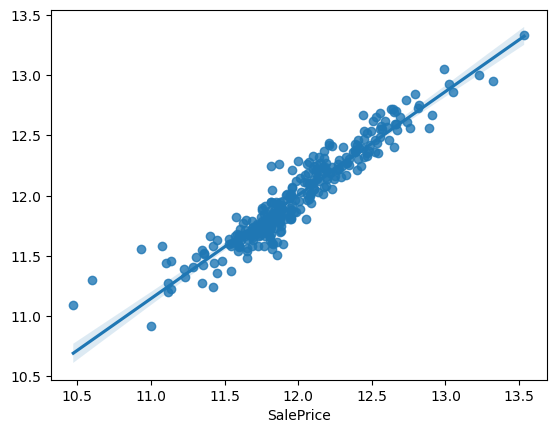

In [171]:
sns.regplot(
    x=y_test,
    y=y_pred,
)

<Axes: xlabel='SalePrice'>

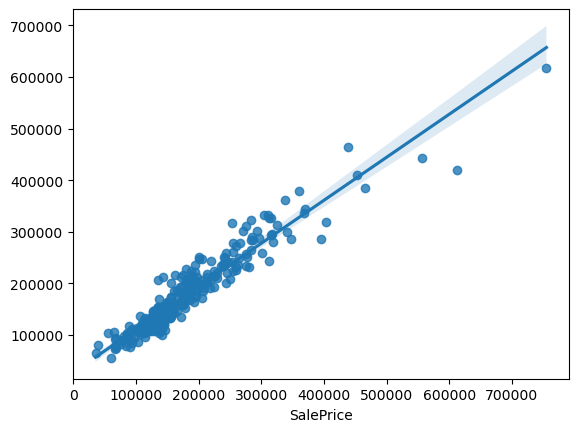

In [172]:
sns.regplot(x=np.exp(y_test), y=np.exp(y_pred))

In [173]:
fig_linear_regression = px.scatter(
    x=np.exp(y_test),
    y=np.exp(y_pred),
    trendline="ols",
    title="Linear Regression",
    labels={
        "y": "Predicted sale price ($)",
        "x": "Sale price ($)",
    },
)

fig_linear_regression.show()

In [174]:
# df.iloc[130].drop(columns=["SalePrice"]).to_dict(orient="index")
# test_dic_obs = df.head(1).drop(columns=["SalePrice"]).to_dict(orient="index").get(0)
test_dic_obs = df.head(1).drop(columns=["SalePrice"]).to_dict(orient="list")
display(test_dic_obs)

{'MSSubClass': [60],
 'MSZoning': ['RL'],
 'LotFrontage': [65.0],
 'LotArea': [8450],
 'Street': ['Pave'],
 'Alley': [nan],
 'LotShape': ['Reg'],
 'LandContour': ['Lvl'],
 'Utilities': ['AllPub'],
 'LotConfig': ['Inside'],
 'LandSlope': ['Gtl'],
 'Neighborhood': ['CollgCr'],
 'Condition1': ['Norm'],
 'Condition2': ['Norm'],
 'BldgType': ['1Fam'],
 'HouseStyle': ['2Story'],
 'OverallQual': [7],
 'OverallCond': [5],
 'YearBuilt': [2003],
 'YearRemodAdd': [2003],
 'RoofStyle': ['Gable'],
 'RoofMatl': ['CompShg'],
 'Exterior1st': ['VinylSd'],
 'Exterior2nd': ['VinylSd'],
 'MasVnrType': ['BrkFace'],
 'MasVnrArea': [196.0],
 'ExterQual': ['Gd'],
 'ExterCond': ['TA'],
 'Foundation': ['PConc'],
 'BsmtQual': ['Gd'],
 'BsmtCond': ['TA'],
 'BsmtExposure': ['No'],
 'BsmtFinType1': ['GLQ'],
 'BsmtFinSF1': [706],
 'BsmtFinType2': ['Unf'],
 'BsmtFinSF2': [0],
 'BsmtUnfSF': [150],
 'TotalBsmtSF': [856],
 'Heating': ['GasA'],
 'HeatingQC': ['Ex'],
 'CentralAir': ['Y'],
 'Electrical': ['SBrkr'],
 '1stFl

In [175]:
testObservation = {
    "MSSubClass": [60],
    "MSZoning": ["RL"],
    "LotFrontage": [65.0],
    "LotArea": [8450],
    "Street": ["Pave"],
    "Alley": [np.NaN],
    "LotShape": ["Reg"],
    "LandContour": ["Lvl"],
    "Utilities": ["AllPub"],
    "LotConfig": ["Inside"],
    "LandSlope": ["Gtl"],
    "Neighborhood": ["CollgCr"],
    "Condition1": ["Norm"],
    "Condition2": ["Norm"],
    "BldgType": ["1Fam"],
    "HouseStyle": ["2Story"],
    "OverallQual": [7],
    "OverallCond": [5],
    "YearBuilt": [2003],
    "YearRemodAdd": [2003],
    "RoofStyle": ["Gable"],
    "RoofMatl": ["CompShg"],
    "Exterior1st": ["VinylSd"],
    "Exterior2nd": ["VinylSd"],
    "MasVnrType": ["BrkFace"],
    "MasVnrArea": [196.0],
    "ExterQual": ["Gd"],
    "ExterCond": ["TA"],
    "Foundation": ["PConc"],
    "BsmtQual": ["Gd"],
    "BsmtCond": ["TA"],
    "BsmtExposure": ["No"],
    "BsmtFinType1": ["GLQ"],
    "BsmtFinSF1": [706],
    "BsmtFinType2": ["Unf"],
    "BsmtFinSF2": [0],
    "BsmtUnfSF": [150],
    "TotalBsmtSF": [856],
    "Heating": ["GasA"],
    "HeatingQC": ["Ex"],
    "CentralAir": ["Y"],
    "Electrical": ["SBrkr"],
    "1stFlrSF": [856],
    "2ndFlrSF": [854],
    "LowQualFinSF": [0],
    "GrLivArea": [1710],
    "BsmtFullBath": [1],
    "BsmtHalfBath": [0],
    "FullBath": [2],
    "HalfBath": [1],
    "BedroomAbvGr": [3],
    "KitchenAbvGr": [1],
    "KitchenQual": ["Gd"],
    "TotRmsAbvGrd": [8],
    "Functional": ["Typ"],
    "Fireplaces": [0],
    "FireplaceQu": ["NaN"],
    "GarageType": ["Attchd"],
    "GarageYrBlt": [2003.0],
    "GarageFinish": ["RFn"],
    "GarageCars": [2],
    "GarageArea": [548],
    "GarageQual": ["TA"],
    "GarageCond": ["TA"],
    "PavedDrive": ["Y"],
    "WoodDeckSF": [0],
    "OpenPorchSF": [61],
    "EnclosedPorch": [0],
    "3SsnPorch": [0],
    "ScreenPorch": [0],
    "PoolArea": [0],
    "PoolQC": ["N"],
    "Fence": ["N"],
    "MiscFeature": ["N"],
    "MiscVal": [0],
    "MoSold": [2],
    "YrSold": [2008],
    "SaleType": ["WD"],
    "SaleCondition": ["Normal"],
    "PropertyAge": [5],
}

In [176]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PropertyAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,7
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,91
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,8
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,32
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,69
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,60


In [177]:
observation2 = pd.DataFrame(testObservation)
observation2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PropertyAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,N,N,N,0,2,2008,WD,Normal,5


In [178]:
observation3 = pd.DataFrame(test_dic_obs)
observation3

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,PropertyAge
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,5


In [179]:
obs_3 = pipeline_pca.transform(X=observation3)
obs_3

array([[ 2.47626203, -0.38325331, -2.2153092 , -1.88868405,  0.29446764,
        -0.01081552,  1.09289066, -1.68191577, -0.43443422, -0.046136  ,
         0.48351589,  0.18798737,  1.0615886 , -0.0238748 , -0.19334382,
        -0.30433203,  0.33468599, -0.99078964, -0.06786738, -0.91394908,
         0.31801126,  0.39667343, -0.10639974,  0.27366428,  0.52124754,
        -0.15245194, -0.85833247, -0.56444252,  0.86742539, -0.3661488 ,
        -0.00877834,  0.38250198,  0.08602529,  0.06229271,  0.27889977,
        -0.2748015 ,  0.09749007,  0.11911534, -0.20723733,  0.0210162 ,
        -0.38397807, -0.19979327,  0.12387793,  0.11494862, -0.03826345,
         0.12986648, -0.19379307, -0.13188905, -0.27489831, -0.2687945 ,
         0.4502724 ,  0.09492548,  0.44297478, -0.204232  ,  0.11063511,
        -0.06758088,  0.06688559, -0.00812139, -0.15111979,  0.06789471,
        -0.01633488, -0.01659191,  0.01426116, -0.14657016, -0.15326417,
         0.02506254, -0.00831883,  0.05553964,  0.2

In [180]:
X_pca[0]

array([ 2.47626203, -0.38325331, -2.2153092 , -1.88868404,  0.29446758,
       -0.01081552,  1.09289046, -1.68191576, -0.43443439, -0.04613625,
        0.48351563,  0.18798738,  1.06158871, -0.02387524, -0.19334351,
       -0.3043321 ,  0.33468586, -0.99078974, -0.06786627, -0.91394881,
        0.31801098,  0.39667218, -0.10639709,  0.27366669,  0.52124466,
       -0.15245221, -0.85832537, -0.5644049 ,  0.86743466, -0.36614493,
       -0.00876511,  0.38257995,  0.08604252,  0.06227807,  0.27896059,
       -0.27482273,  0.09735228,  0.11902889, -0.20729646,  0.02113492,
       -0.38416119, -0.19952532,  0.12390869,  0.11515311, -0.03847028,
        0.13011291, -0.19381749, -0.13176099, -0.27440857, -0.26866433,
        0.45051973,  0.09484972,  0.44326951, -0.20406718,  0.1110985 ,
       -0.06682741,  0.06798666, -0.00770486, -0.14933778,  0.07016615,
       -0.01608412, -0.0168923 ,  0.01527402, -0.14597953, -0.15093902,
        0.02446617, -0.00686869,  0.05841671,  0.2888524 , -0.18

In [181]:
def predict_observation(
    df: pd.DataFrame,
    processorPipeline: Pipeline = pipeline_pca,
    model: LinearRegression = pca_model,
):
    obs = processorPipeline.transform(df)

    # the target was normalized using natural logarithm, so we need to use np.exp to get the actual value
    pred = np.exp(model.predict(obs.reshape(1, -1))[0])
    return pred

In [182]:
# The actual price of the row at index 0, which the observation is based on.
print(f"Price: {df.iloc[0]['SalePrice']}")

Price: 208500


In [183]:
# obs_proccessed = pipeline_pca.fit_transform(observation2)
prediction = np.exp(pca_model.predict(obs_3.reshape(1, -1))[0])
prediction

211039.3421839207

In [184]:
predict_observation(observation3)

211039.3421839207

In [185]:
categorical_feat_options = {}
for col in categorical_columns.to_list():
    categorical_feat_options[col] = df[col].unique()

In [186]:
categorical_feat_options["Street"]

array(['Pave', 'Grvl'], dtype=object)

In [187]:
# default numberic values
numerical_default_values = (
    df[numerical_columns].describe().loc[["min", "max"]].to_dict()
)
display(numerical_default_values)

{'MSSubClass': {'min': 20.0, 'max': 190.0},
 'LotFrontage': {'min': 21.0, 'max': 313.0},
 'LotArea': {'min': 1300.0, 'max': 215245.0},
 'OverallQual': {'min': 1.0, 'max': 10.0},
 'OverallCond': {'min': 1.0, 'max': 9.0},
 'YearBuilt': {'min': 1872.0, 'max': 2010.0},
 'YearRemodAdd': {'min': 1950.0, 'max': 2010.0},
 'MasVnrArea': {'min': 0.0, 'max': 1600.0},
 'BsmtFinSF1': {'min': 0.0, 'max': 5644.0},
 'BsmtFinSF2': {'min': 0.0, 'max': 1474.0},
 'BsmtUnfSF': {'min': 0.0, 'max': 2336.0},
 'TotalBsmtSF': {'min': 0.0, 'max': 6110.0},
 '1stFlrSF': {'min': 334.0, 'max': 4692.0},
 '2ndFlrSF': {'min': 0.0, 'max': 2065.0},
 'LowQualFinSF': {'min': 0.0, 'max': 572.0},
 'GrLivArea': {'min': 334.0, 'max': 5642.0},
 'BsmtFullBath': {'min': 0.0, 'max': 3.0},
 'BsmtHalfBath': {'min': 0.0, 'max': 2.0},
 'FullBath': {'min': 0.0, 'max': 3.0},
 'HalfBath': {'min': 0.0, 'max': 2.0},
 'BedroomAbvGr': {'min': 0.0, 'max': 8.0},
 'KitchenAbvGr': {'min': 0.0, 'max': 3.0},
 'TotRmsAbvGrd': {'min': 2.0, 'max': 14

In [188]:
from types_utils.data_fields import data


for k, b in numerical_default_values.items():
    data[k]["minValue"] = b.get("min")  # type: ignore
    data[k]["maxValue"] = b.get("max")  # type: ignore
    data[k]["defaultValue"] = b.get("max") - ((b.get("max") - b.get("min")) / 2)  # type: ignore

print(data.get("PoolArea"))  # type: ignore

{'name': 'PoolArea', 'description': 'Pool area in square feet', 'minValue': 0.0, 'maxValue': 738.0, 'value': 0.0, 'defaultValue': 369.0}


In [189]:
with open("../src/types_utils/data_fields.py", "w") as file:
    file.write("data = {\n")
    for key, value in data.items():
        file.write(f"    '{key}': {value},\n")
    file.write("}\n")

In [190]:
# percent of erros based on RMSE
pecenta_RMSE = 0.14223083556276495 / df["SalePrice"].mean() * 100

In [191]:
import statsmodels.api as sm


sum_mol = sm.OLS(y, X_pca)

result = sum_mol.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.056
Method:                 Least Squares   F-statistic:                            0.01720
Date:                Sun, 11 Aug 2024   Prob (F-statistic):                        1.00
Time:                        22:44:37   Log-Likelihood:                         -5702.6
No. Observations:                1460   AIC:                                  1.156e+04
Df Residuals:                    1381   BIC:                                  1.198e+04
Df Model:                          79                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1165      0.107      1.090      0.276      -0.093       0.326
x2             0.0218      0.166      0.131      0.896      -0.304       0.348
x3             0.0290      0.177      0.164      0.870      -0.318       0.376
x4            -0.0140      0.215     -0.065      0.948      -0.436       0.408
x5            -0.0411      0.251     -0.164      0.870      -0.533       0.451
x6             0.0340      0.273      0.125      0.901      -0.501       0.569
x7            -0.0126      0.281     -0.045      0.964      -0.563       0.538
x8             0.0020      0.293      0.007      0.994      -0.572       0.576
x9             0.0283      0.296      0.096      0.924      -0.553       0.609
x10            0.0039      0.300      0.013      0.989      -0.584       0.592
x11           -0.0076      0.307     -0.025      0.980      -0.610       0.595
x12            0.0123      0.312      0.039      0.969      -0.599       0.624
x13           -0.0058      0.315     -0.019      0.985      -0.624       0.612
x14           -0.0111      0.318     -0.035      0.972      -0.634       0.612
x15           -0.0029      0.324     -0.009      0.993      -0.639       0.633
x16            0.0042      0.335      0.013      0.990      -0.653       0.662
x17            0.0066      0.339      0.020      0.984      -0.658       0.671
x18           -0.0019      0.344     -0.005      0.996      -0.676       0.672
x19           -0.0216      0.350     -0.062      0.951      -0.707       0.664
x20           -0.0326      0.360     -0.090      0.928      -0.740       0.674
x21            0.0031      0.374      0.008      0.993      -0.731       0.737
x22            0.0043      0.387      0.011      0.991      -0.754       0.763
x23            0.0216      0.402      0.054      0.957      -0.768       0.811
x24            0.0132      0.406      0.033      0.974      -0.783       0.810
x25            0.0002      0.415      0.001      1.000      -0.813       0.814
x26            0.0009      0.460      0.002      0.998      -0.902       0.904
x27            0.0223      0.479      0.046      0.963      -0.918       0.963
x28           -0.0003      0.494     -0.001      1.000      -0.969       0.968
x29            0.0015      0.505      0.003      0.998      -0.989       0.992
x30           -0.0460      0.549     -0.084      0.933      -1.122       1.031
x31           -0.0554      0.565     -0.098      0.922      -1.163       1.052
x32            0.0093      0.572      0.016      0.987      -1.113       1.131
x33            0.0243      0.579      0.042      0.966      -1.111       1.160
x34            0.0355      0.603      0.059      0.953      -1.147       1.218
x35           -0.0075      0.606     -0.012      0.990      -

## Preserving the model


In [192]:
# create dictionary with what we want to preserve

from ml_model.preserve_model import write_model


artifacts = {
    "preprocessor": pipeline_pca,
    "lc_model": pca_model,
    "X_test": X_test,
    "y_test": y_test,
    "categorial_options": categorical_feat_options,
    "numerical_defaults": numerical_default_values,
}

write_model(artifacts=artifacts)

Artifacts saved
